In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv('data/immo_data.csv')

In [3]:
# remove columns that are not allowed to be used to predict totalRent
df.drop(['serviceCharge', 'baseRent'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   heatingType               223994 non-null  object 
 2   telekomTvOffer            236231 non-null  object 
 3   telekomHybridUploadSpeed  45020 non-null   float64
 4   newlyConst                268850 non-null  bool   
 5   balcony                   268850 non-null  bool   
 6   picturecount              268850 non-null  int64  
 7   pricetrend                267018 non-null  float64
 8   telekomUploadSpeed        235492 non-null  float64
 9   totalRent                 228333 non-null  float64
 10  yearConstructed           211805 non-null  float64
 11  scoutId                   268850 non-null  int64  
 12  noParkSpaces              93052 non-null   float64
 13  firingTypes               211886 non-null  o

In [5]:
df.describe()

,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,livingSpace,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,268850.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,74.355548,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,254.759208,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,54.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,67.320000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,87.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,111111.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [6]:
df.nunique()

regio1                          16
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    95
pricetrend                    1234
telekomUploadSpeed               7
totalRent                    28486
yearConstructed                465
scoutId                     268850
noParkSpaces                    71
firingTypes                    132
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
houseNumber                   5510
livingSpace                  13005
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       52373
streetPlain                  54490
lift                             2
baseRentRange                    9
typeOfFlat          

## Feature Selection

In [7]:
df.drop(['telekomHybridUploadSpeed'], axis=1, inplace=True) # has only one value
df.drop(['date'], axis=1, inplace=True) # scraping is irrelavant to the price; not possible for real environment
df.drop(['geo_bln'], axis=1, inplace=True) # same as regio1
df.drop(['houseNumber', 'street', 'streetPlain', 'regio3', 'description', 'facilities', 'scoutId'], axis=1, inplace=True) # too many (unrelated) values
df.drop(['baseRentRange'], axis=1, inplace=True) # without knowing the baseRent we cannot know the baseRentRange

In [8]:
is_na = df.isna().sum()
columns = df.columns[((is_na/len(df)) > 0.40)]

In [9]:
columns

Index(['noParkSpaces', 'interiorQual', 'petsAllowed', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [10]:
df.drop(columns, axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   heatingType           223994 non-null  object 
 2   telekomTvOffer        236231 non-null  object 
 3   newlyConst            268850 non-null  bool   
 4   balcony               268850 non-null  bool   
 5   picturecount          268850 non-null  int64  
 6   pricetrend            267018 non-null  float64
 7   telekomUploadSpeed    235492 non-null  float64
 8   totalRent             228333 non-null  float64
 9   yearConstructed       211805 non-null  float64
 10  firingTypes           211886 non-null  object 
 11  hasKitchen            268850 non-null  bool   
 12  cellar                268850 non-null  bool   
 13  yearConstructedRange  211805 non-null  float64
 14  livingSpace           268850 non-null  float64
 15  

<AxesSubplot:>

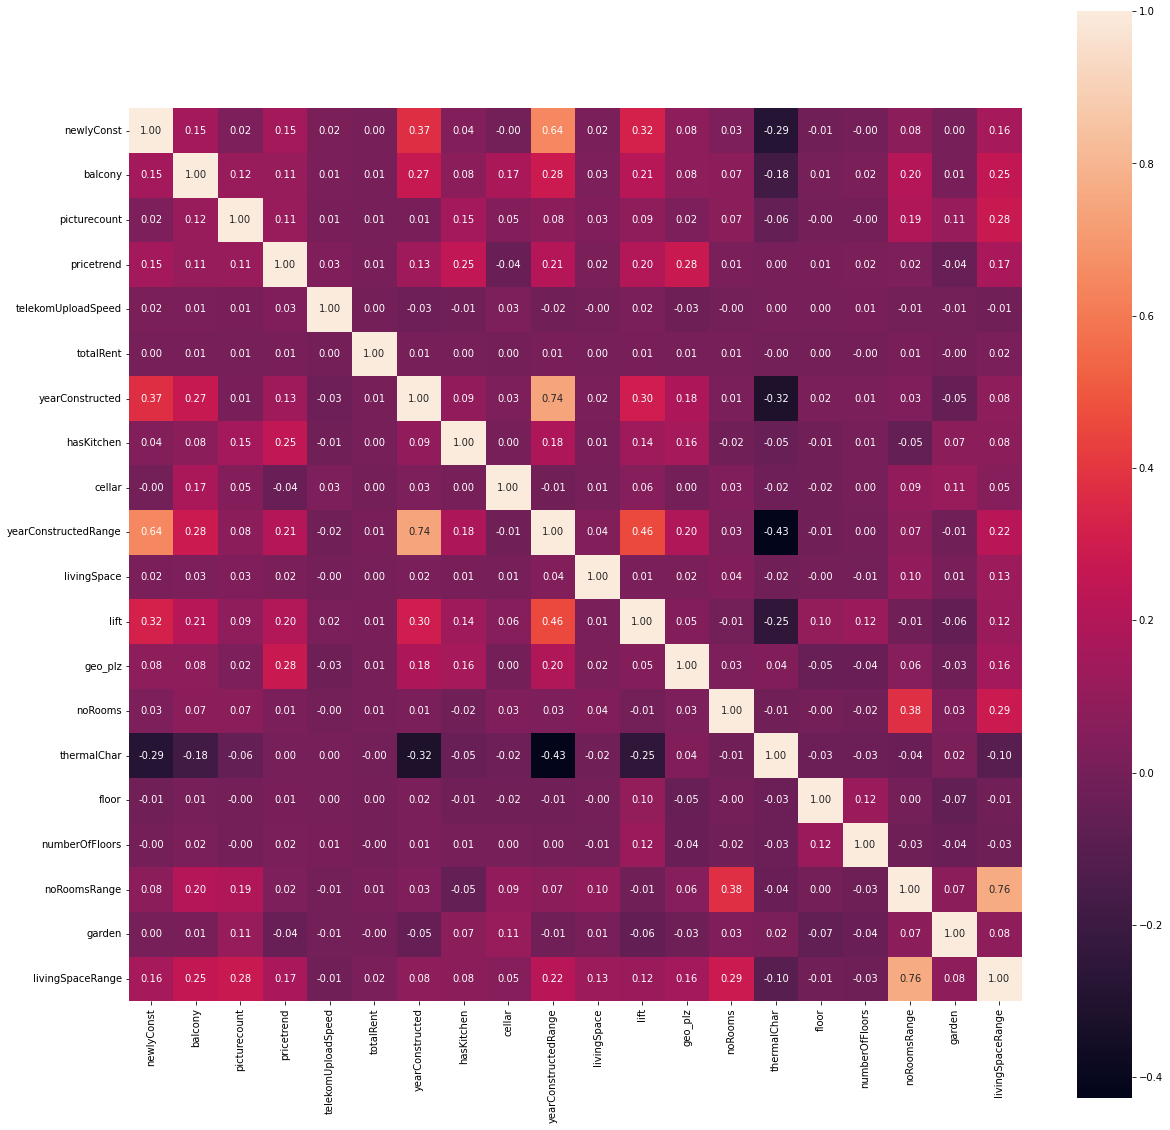

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

## Preprocess Data

In [13]:
df = df[df['totalRent'].notna()]

In [14]:
num_cols = []
for cols in df.columns:
    if df[cols].dtype in ['int64', 'float64'] and cols != 'totalRent':
        num_cols.append(cols)

In [15]:
df.fillna(df._get_numeric_data().mean(), inplace = True)

In [16]:
df[num_cols] = normalize(df[num_cols])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228333 entries, 0 to 268848
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                228333 non-null  object 
 1   heatingType           191510 non-null  object 
 2   telekomTvOffer        200904 non-null  object 
 3   newlyConst            228333 non-null  bool   
 4   balcony               228333 non-null  bool   
 5   picturecount          228333 non-null  float64
 6   pricetrend            228333 non-null  float64
 7   telekomUploadSpeed    228333 non-null  float64
 8   totalRent             228333 non-null  float64
 9   yearConstructed       228333 non-null  float64
 10  firingTypes           179919 non-null  object 
 11  hasKitchen            228333 non-null  bool   
 12  cellar                228333 non-null  bool   
 13  yearConstructedRange  228333 non-null  float64
 14  livingSpace           228333 non-null  float64
 15  

In [18]:
df.fillna('NOT_APPLICABLE', inplace=True)

In [19]:
df.head()

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2
0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,0.000135,0.000104,0.000226,840.00,0.044344,...,ground_floor,0.999006,0.000090,0.004094,0.000023,0.000068,0.000090,True,0.000090,Dortmund
2,Sachsen,floor_heating,ONE_YEAR_FREE,True,True,0.003475,0.001181,0.001042,1300.00,0.876998,...,apartment,0.476507,0.001303,0.049491,0.001303,0.001737,0.001303,False,0.001737,Dresden
4,Bremen,self_contained_central_heating,NOT_APPLICABLE,False,True,0.000672,0.000087,0.001023,903.00,0.068951,...,apartment,0.997592,0.000106,0.006679,0.000035,0.000127,0.000106,False,0.000141,Bremen
6,Sachsen,self_contained_central_heating,ONE_YEAR_FREE,False,False,0.000918,0.000103,0.000245,380.00,0.200601,...,NOT_APPLICABLE,0.979583,0.000204,0.011627,0.000102,0.000408,0.000204,True,0.000306,Mittelsachsen_Kreis
7,Bremen,central_heating,ONE_YEAR_FREE,False,True,0.000174,0.000066,0.000083,584.25,0.068059,...,ground_floor,0.997677,0.000104,0.002189,0.000074,0.000124,0.000104,False,0.000069,Bremen


## AA

In [20]:
df_no_categ = df._get_numeric_data()

## One Hot Encoding

In [39]:
df = pd.get_dummies(df)

In [40]:
df.head()

,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,...,regio2_Wolfsburg,regio2_Worms,regio2_Wunsiedel_im_Fichtelgebirge_Kreis,regio2_Wuppertal,regio2_Würzburg,regio2_Würzburg_Kreis,regio2_Zollernalbkreis,regio2_Zweibrücken,regio2_Zwickau,regio2_Zwickau_Kreis
0,False,False,0.000135,0.000104,0.000226,840.00,0.044344,False,True,0.000045,...,0,0,0,0,0,0,0,0,0,0
2,True,True,0.003475,0.001181,0.001042,1300.00,0.876998,False,True,0.003909,...,0,0,0,0,0,0,0,0,0,0
4,False,True,0.000672,0.000087,0.001023,903.00,0.068951,False,False,0.000035,...,0,0,0,0,0,0,0,0,0,0
6,False,False,0.000918,0.000103,0.000245,380.00,0.200601,False,True,0.000376,...,0,0,0,0,0,0,0,0,0,0
7,False,True,0.000174,0.000066,0.000083,584.25,0.068059,False,True,0.000069,...,0,0,0,0,0,0,0,0,0,0


## Split

In [21]:
y_name = 'totalRent'

In [41]:
X_ = df_no_categ.loc[:, df_no_categ.columns != y_name]
y_ = df_no_categ[y_name]
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.33, random_state=42)

In [42]:
X = df.loc[:, df.columns != y_name]
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [28]:
reg = LinearRegression().fit(X_train_, y_train_)
pred = reg.predict(X_test_)
math.sqrt(mean_squared_error(y_test_, pred))

57409.742511484365

In [43]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
math.sqrt(mean_squared_error(y_test, pred))

12432586216363.105

## Regression Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
regr = DecisionTreeRegressor(max_depth=5).fit(X_train_, y_train_)
pred = regr.predict(X_test_)
math.sqrt(mean_squared_error(y_test_, pred))

57827.643154264544

In [44]:
regr = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
pred = regr.predict(X_test)
math.sqrt(mean_squared_error(y_test, pred))

57835.382454914936

## Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
regr = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train_, y_train_)
pred = regr.predict(X_test_)
math.sqrt(mean_squared_error(y_test_, pred))

57510.50649900566

In [45]:
regr = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)
pred = regr.predict(X_test)
math.sqrt(mean_squared_error(y_test, pred))

57433.70856926935